In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, cophenet
from sklearn import metrics
import seaborn as sns
from scipy.spatial import distance
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']



In [13]:
df = pd.read_csv("../../datasets/WorkMedia.csv", sep=";")


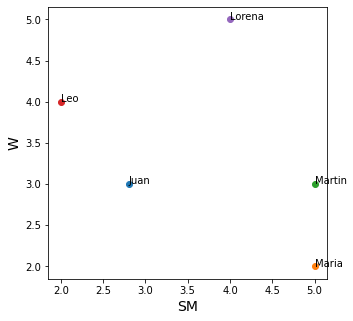

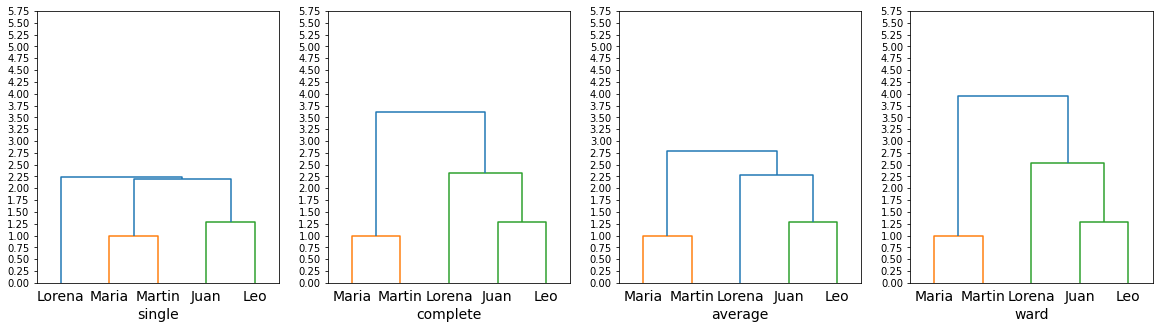

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('SM', fontsize=14)
ax.set_ylabel('W', fontsize=14)
for index, row in df.iterrows():
    ax.scatter(row["SM"], row["W"])#, marker=markers[df["Grupo"]%len(markers)], color=colors[df["Grupo"]%len(colors)]
    ax.annotate(str(row["Nombre"]), (row["SM"], row["W"]))
plt.show()
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ms = ['single', 'complete', 'average', 'ward']
dms = []
Zs = []
for m, ax in zip(ms, axs) :
    dm = pdist(df[["SM", "W"]], metric='euclidean') #single, complete, average, and ward
    dms.append(dm)

    Z = linkage(dm, method=m)#single, complete, average, and ward
    Zs.append(Z)
    d = dendrogram(Z, labels=list(df["Nombre"]), show_leaf_counts=True, leaf_font_size=14, ax=ax)
    ax.set_xlabel(m, fontsize=14)
    ax.set_yticks(np.arange(0, 6, 0.25))

plt.show()

<Axes: >

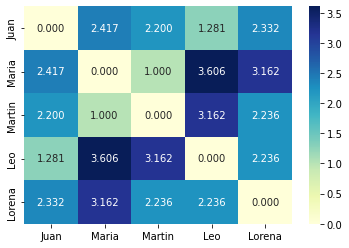

In [15]:
dm = dms[0]
dist_square = distance.squareform(dm)
sns.heatmap(dist_square, 
            annot=True,  
            fmt='.3f', 
            cmap='YlGnBu', 
            yticklabels=list(df["Nombre"]),
            xticklabels=list(df["Nombre"]))

    
